  # A Sentiment Analysis on Hotels.ng 

A sentiment analysis carried out on the reviews left by hotel customers on hotels.ng to better advise hotel managements on how to improve their hospitality services for upward profit mobility. EDA carried out also provides insights as to whether or not these ratings are really the problem.

# Group A Team
1. Jikmyan Mangut Sunday
2. Leritmwa Danladi
3. Ayomide Oraegbu
4. Tshokelo Tumelo (Teaching Assistant TGB)

This project was carried out by first doing  a web-scraping on the hotels.ng site of hotel information for 2 states and the capital city. This was done using "Octoparse", a web-scraping tool that scrapes data in structured format instead of traditionally using beautiful soup, selenium and so on. The information gotten off of the site was then mergd into one dataframe for easy manipulation; with the column headers made to be in the same format prior to the marge(concatenation).
The cleaning of the data began with the changing of the values of the "Rating" and "Price" columns which were originally entered in string type to numeric type. The columns that were considered irrelevant to the whole process as well. It was observed that there were duplicates which had no ratings at all, neither were there any review texts with them. The columns with NaN entries were dropped for the time being pending when these prices for the duplicates would be used. For preprocessing the texts, we used Spacy, a Natural Language Processing tool to removepunctuation marks, extra spaces and stopwords as well. WordClouds were plotted for the highest occuring words in the textx, the cities with the highest number of hotels, indicating the most visited city. The hotels were also grouped by price, city as well. Also, the worlcloud for each city's text was plotted.

                        WEB-SCRAPPING
                        
Webscrapping of the hotels.ng site was performed with the Octoparse tool, a very powerful web-scrapping tool that scrappes data in a structured format.

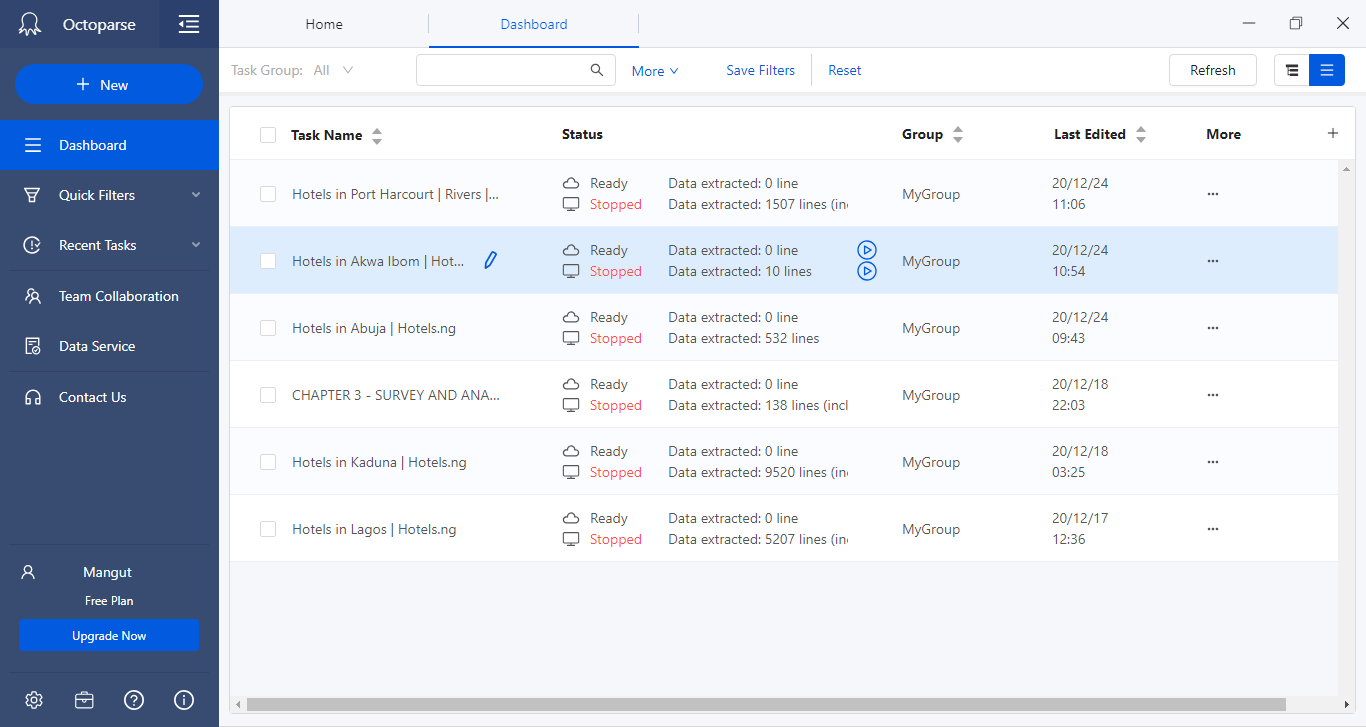

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# using pandas to read the csv files
df1 = pd.read_csv("https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Abuja%20Hotels.csv")
df2 = pd.read_csv('https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Lagos%20Hotels.csv')
df3 = pd.read_csv("https://raw.githubusercontent.com/TGA-Sept-Cohort-Group-A/Reviews-Project/main/Kaduna%20Hotels.csv")

Here we used the pandas .read_csv() function to read each of the files for the diffrent cities, Abuja, Lagos and Kaduna

In [3]:
# Renaming the 'Title' column as 'Hotel_Title'
df1 = df1.rename(columns = {'Title':'Hotel_Title','Review':'Review_Text'}, inplace = False)

We noticed that the table format/headings for the cities were not the same all through so we renamed them, the ones for Abuja specifically

In [4]:
#Dropping some columns that are irrelevant to the analysis
df2.drop('Number', axis = 1, inplace = True)
df2.drop('Like', axis = 1, inplace = True)
df3.drop('Number_of_Reviews', axis = 1, inplace = True)

There were columns in two of the three files we considered as irrelevant to our work and so we dropped them

In [5]:
df1['State'] = 'Abuja'
df2['State'] = 'Lagos'
df3['State'] = 'Kaduna'

A separate 'State' column was created for each city to indicate the state that each city is in

In [6]:
#combine all files in the list
combined_csv = pd.concat([df1,df2,df3])

Here the dataframes for the three cities were combined

In [7]:
combined_csv.head()

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....","₦13,000\n ...",7.4 Very Good,Abuja
1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,"₦5,000\n ...",7.3 Very Good,Abuja
2,New Rendezvous Hotel,https://hotels.ng/hotel/36783-new-rendezvous-h...,"Wuse 6, Abuja - 21, Plot 188, Makeni Street, Z...",https://hotels.ng/hotels-in-abuja/wuse-6,Wuse 6,"Very clean room, ventilation was not too good,...","₦5,000\n ...",NaN,Abuja
3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,"₦8,400\n ...",6.8 Very Good,Abuja
4,Orient Hotel,https://hotels.ng/hotel/32651-orient-hotel-abuja,"Wuse, Abuja - 12 Sudan Street",https://hotels.ng/hotels-in-abuja/wuse,Wuse,My stay was okay at the hotel. There were no i...,"₦9,000\n ...",7.4 Very Good,Abuja


In [8]:
duplicates = combined_csv[combined_csv.duplicated()]

Here, we can see the duplicate hotels in the entire dataset

In [9]:
duplicates

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
3299,Joe Dohinbo Hotel And Suites,https://hotels.ng/hotel/1438045-joe-dohinbo-ho...,", Lagos - 18, Badejo Street, Irawo Bus Stop Aj...",https://hotels.ng/hotels-in-lagos/,NaN,NaN,NaN,NaN,Lagos
3300,Exclusive Royal Hotel & Lounge LTD,https://hotels.ng/hotel/1438048-exclusive-roya...,"Isolo, Lagos - 24 Nusiratu Lasisi Street, Isolo",https://hotels.ng/hotels-in-lagos/isolo,Isolo,NaN,"₦12,000\n ...",NaN,Lagos
3301,Dazzle Pearl Homes,https://hotels.ng/hotel/1438054-dazzle-pearl-h...,"Lekki Phase 1, Lagos - No. 1 Wumego Crescent O...",https://hotels.ng/hotels-in-lagos/lekki-phase-1,Lekki Phase 1,NaN,"₦90,000\n ...",NaN,Lagos
3302,Dreams By DV8 Hotel,https://hotels.ng/hotel/1438057-dreams-by-dv8-...,"Surulere, Lagos - 30 Adelabu Street, Surulere",https://hotels.ng/hotels-in-lagos/surulere,Surulere,NaN,"₦36,750\n ...",NaN,Lagos
3303,De'Madera Hotel & Suites,https://hotels.ng/hotel/1438062-demadera-hotel...,"Ikeja, Lagos - No. 21 Eniola Adesanya Street O...",https://hotels.ng/hotels-in-lagos/ikeja,Ikeja,NaN,"₦15,000\n ...",NaN,Lagos
...,...,...,...,...,...,...,...,...,...
9515,Zazarak Motel,https://hotels.ng/hotel/1393408-zazarak-motel,"Zaria, Kaduna - Kataf, Kakuri, Kaduna",https://hotels.ng/hotels-in-kaduna/zaria,Zaria,NaN,NaN,NaN,Kaduna
9516,Kuciano Hotel,https://hotels.ng/hotel/1398757-kuciano-hotel,", Kaduna - 8/9 Libya Road Barnawa Kaduna Stat...",https://hotels.ng/hotels-in-kaduna/,NaN,NaN,NaN,NaN,Kaduna
9517,Nordhaus Hotel,https://hotels.ng/hotel/1398778-nordhaus-hotel,", Kaduna - No.1 Prof Polite Avenue, Karji",https://hotels.ng/hotels-in-kaduna/,NaN,NaN,NaN,NaN,Kaduna
9518,CREEK FOREST HOTELS,https://hotels.ng/hotel/1407398-creek-forest-h...,", Kaduna - 13E ILORIN ROAD MARAFA ESTATE, KADU...",https://hotels.ng/hotels-in-kaduna/,NaN,NaN,NaN,NaN,Kaduna


In [10]:
duplicates['Rating'].isnull().sum()

11088

The number of NaNs Rating column for the duplicate hotels

In [11]:
duplicates['Review_Text'].isnull().sum()

11088

The number of NaNs in the Review_Text column for the duplicate hotels

In [12]:
duplicates['Price'].isnull().sum()

9392

The number of NaNs in the Price column for the duplicate hotels

In [13]:
# getting an overview of the columns of the dataset
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15259 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Hotel_Title  15259 non-null  object
 1   Title_URL    15259 non-null  object
 2   Address      15259 non-null  object
 3   Address_URL  15259 non-null  object
 4   City         10897 non-null  object
 5   Review_Text  711 non-null    object
 6   Price        4337 non-null   object
 7   Rating       540 non-null    object
 8   State        15259 non-null  object
dtypes: object(9)
memory usage: 1.2+ MB


This was so we could get an overview of what the data set looked in terms of the columns and the content in them; how many had all the information needed intact

In [14]:
combined_csv.describe()

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
count,15259,15259,15259,15259,10897,711,4337,540,15259
unique,4121,4171,3803,274,348,690,522,20,3
top,Tibishi Guest Inn,https://hotels.ng/hotel/1398757-kuciano-hotel,", Kaduna - 8/9 Libya Road Barnawa Kaduna Stat...",https://hotels.ng/hotels-in-kaduna/,Kaduna,My stay was okay....,"₦15,000\n ...",6.0 Very Good,Kaduna
freq,919,919,919,3680,2893,4,532,44,9520


This was to get a brief description of the columns; a little like what was done above -numerical entries specifically

In [15]:
# changing the string entries for the 'Price' column to numeric values
combined_csv['Price'] = pd.to_numeric(combined_csv.Price.str.replace('[^\d.]', ''), errors='coerce')

Seeing that the 'Price' and 'Rating' columns had string values, they were converted to numeric values

In [16]:
# making the same changes to the 'Rating' column
combined_csv['Rating'] = pd.to_numeric(combined_csv.Rating.str.replace('[^\d.]', ''), errors='coerce')

In [17]:
combined_csv.head()

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State
0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....",13000.0,7.4,Abuja
1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,5000.0,7.3,Abuja
2,New Rendezvous Hotel,https://hotels.ng/hotel/36783-new-rendezvous-h...,"Wuse 6, Abuja - 21, Plot 188, Makeni Street, Z...",https://hotels.ng/hotels-in-abuja/wuse-6,Wuse 6,"Very clean room, ventilation was not too good,...",5000.0,NaN,Abuja
3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,8400.0,6.8,Abuja
4,Orient Hotel,https://hotels.ng/hotel/32651-orient-hotel-abuja,"Wuse, Abuja - 12 Sudan Street",https://hotels.ng/hotels-in-abuja/wuse,Wuse,My stay was okay at the hotel. There were no i...,9000.0,7.4,Abuja


In [18]:
# getting the mean of the 'Rating' column and rounding it off to one decimal point
mean_Rating = round(combined_csv['Rating'].mean(),1)

In [19]:
mean_Rating 

7.0

In [20]:
# dropping the NaN entries in any row
combined_csv.dropna(how ='any', axis = 0, inplace = True)

Here, the rows with NaN/null entries were dropped across all columns in the dataset. Seeing as we needed the ratings as they are, we let the rows with NaN values be dropped.

In [21]:
# saving the cleaned dataset as a csv file
combined_csv.to_csv('Hotels Combined.csv')

The cleaned, combined dataset was saved as a csv file.

In [22]:
# # in_cities = dataset.groupby(['Hotel_Title', 'City'])
# combined_csv['City'].value_counts().plot.bar()

In [23]:
#using the Groupby Function to aggregate the City and Hotel_Title columns
hotels_in_cities = combined_csv.groupby(['City' ,'Hotel_Title'])

Here, hotels were grouped by what part of whatever city they were located

In [24]:
hotels_in_cities.first()

,,Title_URL,Address,Address_URL,Review_Text,Price,Rating,State
City,Hotel_Title,,,,,,,
Kubwa,Arlington Hotels,https://hotels.ng/hotel/72822-arlington-hotels...,"Kubwa, Abuja - Plot 166 Bakori Road, PW",https://hotels.ng/hotels-in-abuja/kubwa,My stay at the hotel was awesome. The staff at...,7000.0,7.5,Abuja
Lugbe,Blue-view Hotel,https://hotels.ng/hotel/1013093-blue-view-hote...,"Lugbe, Abuja - Light Gold Estate, Lugbe",https://hotels.ng/hotels-in-abuja/lugbe,Staff are very cordial and well mannered. My b...,7000.0,7.2,Abuja
"Surulere,Lagos",BENESTAR SUITES,https://hotels.ng/hotel/88812-benestar-suites-...,"Surulere,Lagos, Lagos - 34 Tafawa Balewa Cres...","https://hotels.ng/hotels-in-lagos/surulere,lagos","My stay at the hotel was worth it, I enjoyed e...",12000.0,7.4,Lagos
Victoria Island,Integrity Hotel And Suites,https://hotels.ng/hotel/1012440-integrity-hote...,"Victoria Island, Lagos - 17, Agbagbon Close O...",https://hotels.ng/hotels-in-lagos/victoria-island,"My stay was very fine, the receptionist was ve...",13000.0,6.0,Lagos
Abuja,AMBIENCE HOTEL ABUJA,https://hotels.ng/hotel/1015140-ambience-hotel...,"Abuja, Abuja - 27 Ontario Cresent, Suncity Es...",https://hotels.ng/hotels-in-abuja/abuja,I had a nice stay...,7000.0,7.4,Abuja
...,...,...,...,...,...,...,...,...
Yaba,Unilag Guest House,https://hotels.ng/hotel/62224-unilag-guest-hou...,"Yaba, Lagos - University Of Lagos Akoka",https://hotels.ng/hotels-in-lagos/yaba,Fun filled stay....,3150.0,6.0,Lagos
Yaba,Peaceland Hotels Limited,https://hotels.ng/hotel/63637-peaceland-hotels...,"Yaba , Lagos - 1 Tokunboh Street, Sabo, Yaba.",https://hotels.ng/hotels-in-lagos/yaba,I had a nice stayed at the hotel....,7000.0,7.5,Lagos
"Yaba, Mainland",Niger Palace Hotel,https://hotels.ng/hotel/19183-niger-palace-hot...,"Yaba, Mainland, Lagos - 1 Thorburn Avenue, Sabo","https://hotels.ng/hotels-in-lagos/yaba,-mainland","\n\nMy stay was just memorable, the hotel's ma...",11000.0,6.0,Lagos


A direct description of the groupby

In [25]:
#using the Groupby Function to aggregate the price and Hotel_Title columns
price_per_city = combined_csv.groupby(['Price','Hotel_Title'])

Here, hotels were grouped by their prices

In [26]:
price_per_city.first()

Title_URL  \
Price    Hotel_Title                                                                  
2000.0   Ajaxbel Hotel            https://hotels.ng/hotel/37612-ajaxbel-hotel-lagos   
2200.0   Elegant Guest Inn        https://hotels.ng/hotel/92434-elegant-guest-in...   
2500.0   K Royal Hotel            https://hotels.ng/hotel/18988-k-royal-hotel-lagos   
3000.0   Alomars Lodge            https://hotels.ng/hotel/33626-alomars-lodge-lagos   
         Ovation Executive Hotel  https://hotels.ng/hotel/92616-ovation-executiv...   
...                                                                             ...   
72030.0  Sheraton Lagos Hotel     https://hotels.ng/hotel/53245-sheraton-lagos-h...   
73400.0  Eko Hotel                https://hotels.ng/hotel/98947-eko-hotel-suites...   
90000.0  Peninsula Hotel          https://hotels.ng/hotel/94146-peninsula-hotel-...   
97850.0  Four Points By Sheraton  https://hotels.ng/hotel/49747-four-points-by-s...   
102000.0 Transcorp Hilton Abuja   https://hotels.ng/hotel/72523-transcorp-hilton...   

                                                                            Address  \
Price    Hotel_Title                                                                  
2000.0   Ajaxbel Hotel            Ajah, Lagos -  5, Hussanat Sanni Close Ogombo ...   
2200.0   Elegant Guest Inn               Kaduna North, Kaduna - 9 Necco Road Mando    
2500.0   K Royal Hotel            Ikotun, Lagos - 30 Olasani Bello Street Off Om...   
3000.0   Alomars Lodge            Ikorodu, Lagos - 5/6 Rotimi Odusanya Street, O...   
         Ovation Executive Hotel  Kaduna South, Kaduna - No 25 Gongola Road Off ...   
...                                                                             ...   
72030.0  Sheraton Lagos Hotel     Ikeja, Lagos - 30 Mobolaji Bank Anthony Way, 2...   
73400.0  Eko Hotel                Victoria Island, Lagos - 1415 Adetokunbo Ademo...   
90000.0  Peninsula Hotel          Lekki, Lagos - Block 94, Plot 16, Lekki-Epe Ex...   
97850.0  Four Points By Sheraton  Victoria Island, Lagos - Plot 9/10 Block 2 Oni...   
102000.0 Transcorp Hilton Abuja   Maitama, Abuja - 1 Aguiyi Ironsi Street Maitam...   

                                                                        Address_URL  \
Price    Hotel_Title                                                                  
2000.0   Ajaxbel Hotel                       https://hotels.ng/hotels-in-lagos/ajah   
2200.0   Elegant Guest Inn          https://hotels.ng/hotels-in-kaduna/kaduna-north   
2500.0   K Royal Hotel                     https://hotels.ng/hotels-in-lagos/ikotun   
3000.0   Alomars Lodge                    https://hotels.ng/hotels-in-lagos/ikorodu   
         Ovation Executive Hotel    https://hotels.ng/hotels-in-kaduna/kaduna-south   
...                                                                             ...   
72030.0  Sheraton Lagos Hotel               https://hotels.ng/hotels-in-lagos/ikeja   
73400.0  Eko Hotel                https://hotels.ng/hotels-in-lagos/victoria-island   
90000.0  Peninsula Hotel                    https://hotels.ng/hotels-in-lagos/lekki   
97850.0  Four Points By Sheraton  https://hotels.ng/hotels-in-lagos/victoria-island   
102000.0 Transcorp Hilton Abuja           https://hotels.ng/hotels-in-abuja/maitama   

                                             City  \
Price    Hotel_Title                                
2000.0   Ajaxbel Hotel                       Ajah   
2200.0   Elegant Guest Inn           Kaduna North   
2500.0   K Royal Hotel                     Ikotun   
3000.0   Alomars Lodge                    Ikorodu   
         Ovation Executive Hotel     Kaduna South   
...                                           ...   
72030.0  Sheraton Lagos Hotel               Ikeja   
73400.0  Eko Hotel                Victoria Island   
90000.0  Peninsula Hotel                    Lekki   
97850.0  Four Points By Sheraton  Victoria Island   
102000.0 Transcorp Hilton Abuja           

To begin prepping the review texts for a wordcloud, the 'Review_Text' entries(characters) were all change to lower case

In [27]:
combined_csv['Cleaned'] = combined_csv["Review_Text"].apply(lambda x: x.lower())

In [28]:
#importing string and regex libraries
import string
import re

In [29]:
# removing punctuations
combined_csv['Cleaned'] = combined_csv['Cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

Here regex functions were used to remove the punctuations in the texts

In [30]:
# removing the spaces caused by the removal of punctations
combined_csv['Cleaned']=combined_csv['Cleaned'].apply(lambda x: re.sub(' +',' ',x))

Here regex was also used to remove any additonal spaces left where the punctuations used to be

In [31]:
for index,text in enumerate(combined_csv['Cleaned'][35:40]):
    print('Review %d:\n'%(index+1),text)

Review 1:
 i quite enjoyed my stay at the hotel i did not exactly have any issues checking in and ou
Review 2:
 the hotel was okay but the advertised wifi was not available the rooms were below standar
Review 3:
 my stay was nice warm place and lovely staff
Review 4:
 my stay was good
Review 5:
 i promised them i will do this review this is my 5th time here i most say i love the en


This codejust printed out five texts just so we can see that the preceeding processes worked 

In [32]:
# !pip install wordcloud

In [33]:
from wordcloud import WordCloud

In [34]:
# !pip install spacy
# !python -m spacy download en_core_web_sm    #downloading the spacy language model

In [35]:
#Importing the Spacy NLP library 
import spacy

Here we imported Spacy, an open source library and used it for pre-processing the texts

In [36]:
#loading the core english language model to the library
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [37]:
#Lemmatization converts words in the second or third forms to their first form variants
combined_csv['lemmatized']=combined_csv['Cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

Here, the lemmatization removed the stopwords

In [38]:
dataset_grouped=combined_csv[['Hotel_Title','lemmatized']].groupby(by='Hotel_Title').agg(lambda x:' '.join(x))
dataset_grouped.head()

,lemmatized
Hotel_Title,
"COMMAND GUEST HOUSE, KADUNA",stay wonderful hotel appreciate prompt service...
Hotel 1960 (Prince Of Anthony),stay weekend hotel wonderful welcome cheerfull...
Hotel Rosebud,patronize hotel close year disap
12th April Resorts Hotel,nice stay hotel perfect ought food
1st Forty Hotel,wow hotel totally amazing excellent staff clea...


Here, the finally state of the pre-processed texts can be seen, grouped by the hotels

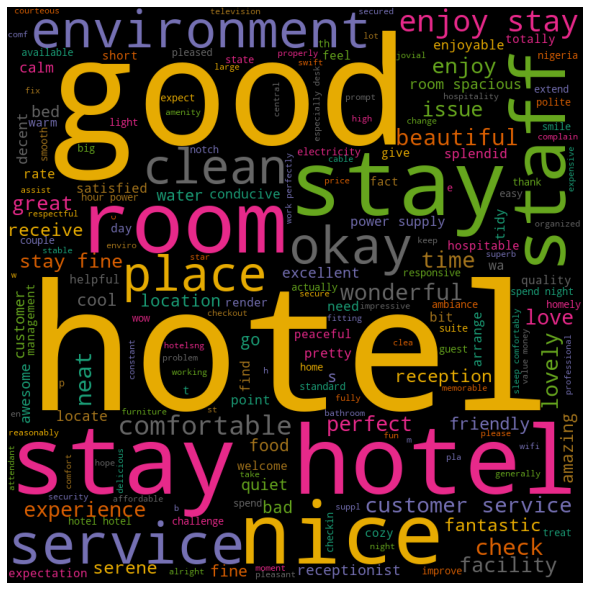

In [39]:
# a wordcloud of review texts from all the hotels
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(combined_csv['lemmatized'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

This is the wordcloud generated from the pre-processed texts from reviews

<AxesSubplot:>

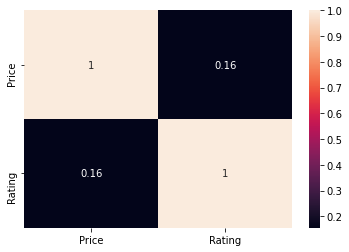

In [40]:
#visualising the price vs Rating on a heatmap
correl = combined_csv[['Price','Rating']]
correl.corr()
sns.heatmap(correl.corr(), annot = True)

This was to see if there was any correlation so to speak between prices of these hotels and the reviews left them by customers

In [41]:
#counting the occurence of the cities with hotels for the three states
combined_csv['City'].value_counts()

Ikeja              51
Lekki              30
Victoria Island    20
Surulere           17
Wuse               13
                   ..
Alakuko             1
Garki               1
Lugbe               1
Yaba, Mainland      1
Ojodu               1
Name: City, Length: 83, dtype: int64

Wordcloud for the cities with hotels in them, using the three cities; Abuja, Lagos,Kaduna.

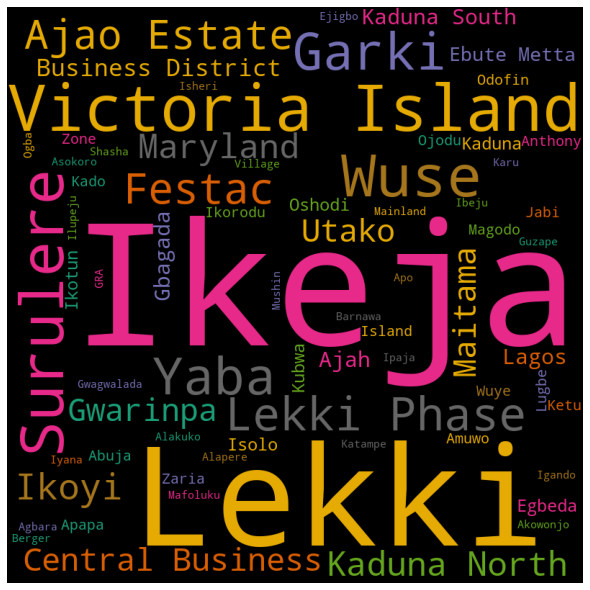

In [42]:
#wordcloud for the cities with hotels in them, using the three cities; Abuja, Lagos,Kaduna
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(combined_csv['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [43]:
#getting a count on the number of times a city appears
State_City = combined_csv.groupby(["State", "City"]).size().reset_index(name="Time")
State_City

,State,City,Time
0,Abuja,Kubwa,1
1,Abuja,Lugbe,1
2,Abuja,Abuja,2
3,Abuja,Apo,1
4,Abuja,Asokoro,1
...,...,...,...
78,Lagos,Surulere,17
79,Lagos,Victoria Island,20
80,Lagos,Yaba,11
81,Lagos,Yaba,1


A concatenation of the three csv files for the cities were performed, here, we aggregated for each State individually in other to get insights on a State-wise basis.

In [44]:
#aggregating Abuja from the combined_csv for the hotel cities in Abuja
Hotel_Cities_Abuja = combined_csv.loc[combined_csv["State"] == "Abuja"]

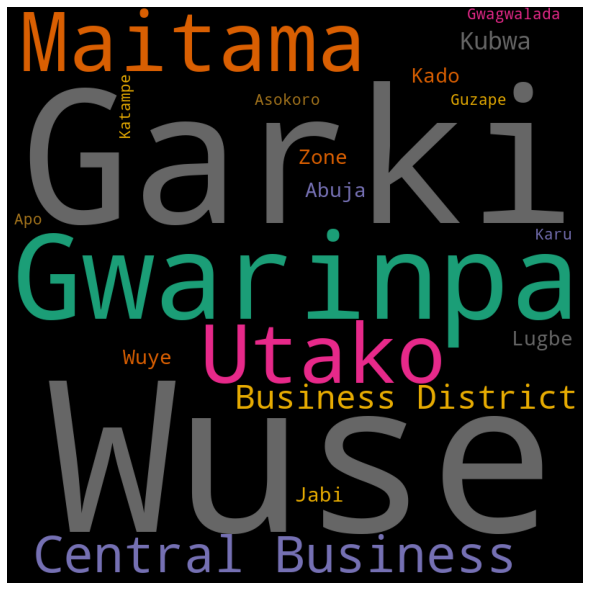

In [45]:
#wordcloud for the cities in Abuja showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Abuja['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [46]:
#aggregating from the combined_csv for the hotel cities in Lagos
Hotel_Cities_Lagos = combined_csv.loc[combined_csv["State"] == "Lagos"]

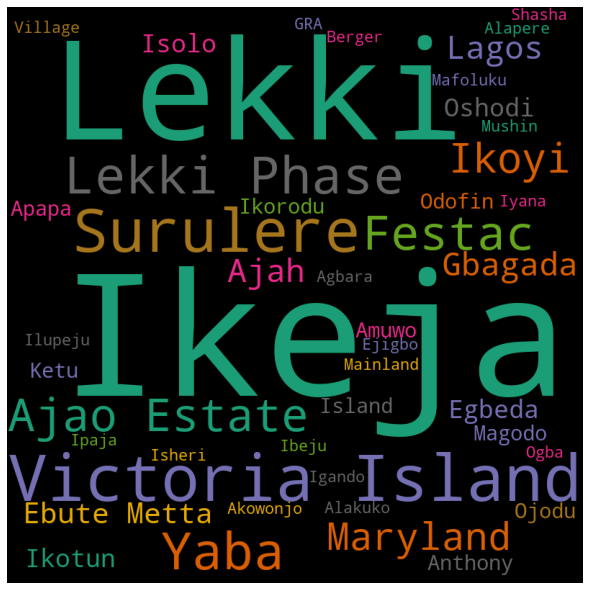

In [47]:
#wordcloud for the cities in Lagos showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Lagos['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [48]:
#aggregating from the combined_csv for the hotel cities in Kaduna
Hotel_Cities_Kaduna = combined_csv.loc[combined_csv["State"] == "Kaduna"]

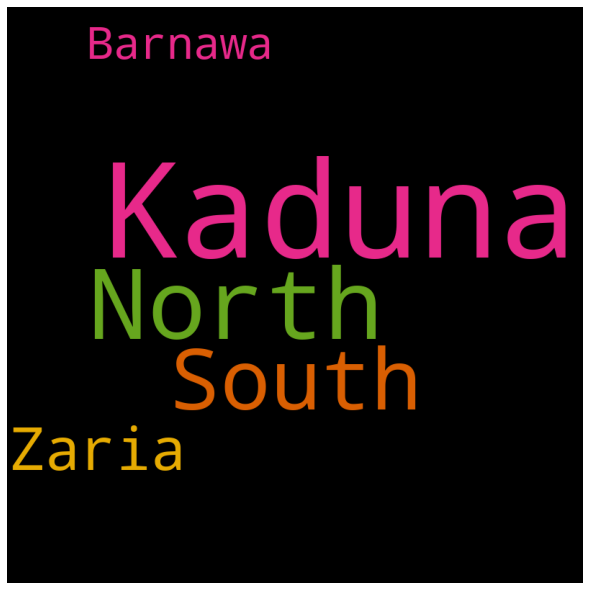

In [49]:
#wordcloud for the cities in Lagos showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Hotel_Cities_Kaduna['City'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

A concatenation of the three csv files for the cities were performed. Here, we aggregated for each State individually in other to get insights from the Review_Text on a State-wise basis.

In [50]:
#aggregating Abuja from the combined_csv for the Review_text in Abuja
Review_Text_Abuja = combined_csv.loc[combined_csv["State"] == "Abuja"]

In [51]:
Review_Text_Abuja.head(4)

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State,Cleaned,lemmatized
0,Grand Ibro Hotel,https://hotels.ng/hotel/34353-grand-ibro-hotel...,"Wuse, Abuja - 2121 Micheal Okpara Road Opposit...",https://hotels.ng/hotels-in-abuja/wuse,Wuse,"Good stay, my stay was very fine....",13000.0,7.4,Abuja,good stay my stay was very fine,good stay stay fine
1,Power Mike Hotels,https://hotels.ng/hotel/995346-power-mike-hote...,"Garki, Abuja - 9 Argungu Close , Off Benue Cre...",https://hotels.ng/hotels-in-abuja/garki,Garki,The room was reasonably tidy with a very big b...,5000.0,7.3,Abuja,the room was reasonably tidy with a very big b...,room reasonably tidy big bed sleep comfortably...
3,Summit Villas Suites,https://hotels.ng/hotel/37489-summit-villas-su...,"Gwarinpa, Abuja - Life Camp Junction, Opposit...",https://hotels.ng/hotels-in-abuja/gwarinpa,Gwarinpa,The hotel is beautiful and fully equipped. Hos...,8400.0,6.8,Abuja,the hotel is beautiful and fully equipped hosp...,hotel beautiful fully equip hospitable respons...
4,Orient Hotel,https://hotels.ng/hotel/32651-orient-hotel-abuja,"Wuse, Abuja - 12 Sudan Street",https://hotels.ng/hotels-in-abuja/wuse,Wuse,My stay was okay at the hotel. There were no i...,9000.0,7.4,Abuja,my stay was okay at the hotel there were no is...,stay okay hotel issue stay receive


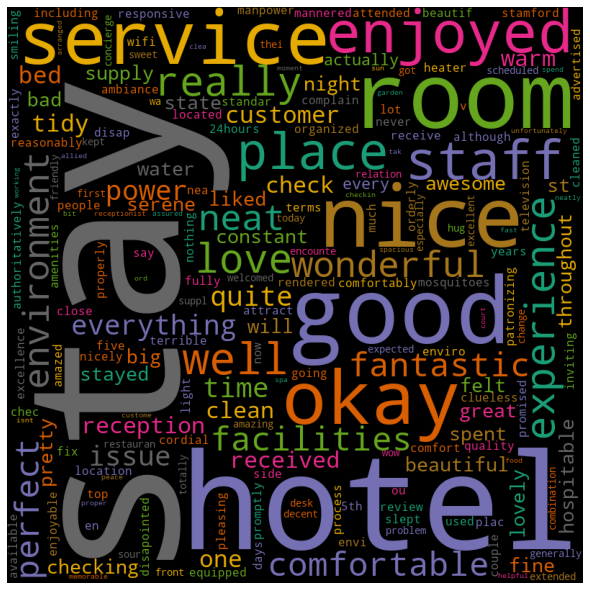

In [52]:
#wordcloud for the Review_text in Abuja showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Review_Text_Abuja['Cleaned'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [53]:
#aggregating Lagos from the combined_csv for the Review_text in Lagos
Review_Text_Lagos = combined_csv.loc[combined_csv["State"] == "Lagos"]
Review_Text_Lagos.head(2)

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State,Cleaned,lemmatized
2,Beni Apartments,https://hotels.ng/hotel/55821-beni-apartments-...,"Victoria Island, Lagos - Plot 37 Ahmed Onibudo...",https://hotels.ng/hotels-in-lagos/victoria-island,Victoria Island,My stay at the hotel was a wonderful one. The ...,12000.0,7.4,Lagos,my stay at the hotel was a wonderful one the h...,stay hotel wonderful hotel nice place beautifu
3,Beni Hotels,https://hotels.ng/hotel/66239-beni-hotels-lagos,"Lagos Island, Lagos - 11/13 Wimo Onatere Stree...",https://hotels.ng/hotels-in-lagos/lagos-island,Lagos Island,I really didn't have any problem fitting in at...,7500.0,7.3,Lagos,i really didnt have any problem fitting in at ...,not problem fitting hotel picture


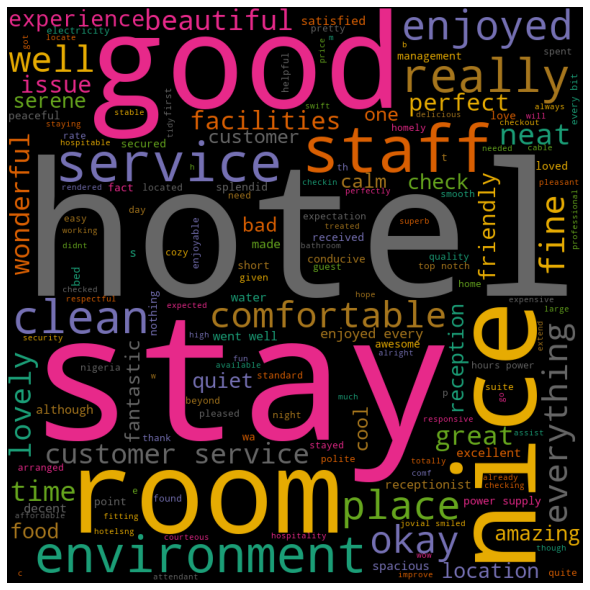

In [54]:
#wordcloud for the Review_text in Lagos showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Review_Text_Lagos['Cleaned'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [55]:
#aggregating Kaduna from the combined_csv for the Review_text in Kaduna
Review_Text_Kaduna = combined_csv.loc[combined_csv["State"] == "Kaduna"]
Review_Text_Kaduna.head(2)

,Hotel_Title,Title_URL,Address,Address_URL,City,Review_Text,Price,Rating,State,Cleaned,lemmatized
0,Hotel Seventeen,https://hotels.ng/hotel/44141-hotel-17-kaduna,"Kaduna, Kaduna - 6 Tafawa Balewa Way Lafiya Road",https://hotels.ng/hotels-in-kaduna/kaduna,Kaduna,Nice stay but the hotel did not have a shoe sh...,18313.0,6.8,Kaduna,nice stay but the hotel did not have a shoe sh...,nice stay hotel shoe shiner
1,Epitome Hotels,https://hotels.ng/hotel/23912-epitome-hotels-s...,"Kaduna South, Kaduna - 12/13 Ethiopia Street.",https://hotels.ng/hotels-in-kaduna/kaduna-south,Kaduna South,"I enjoyed my stay, the environment was cool....",9000.0,6.9,Kaduna,i enjoyed my stay the environment was cool,enjoy stay environment cool


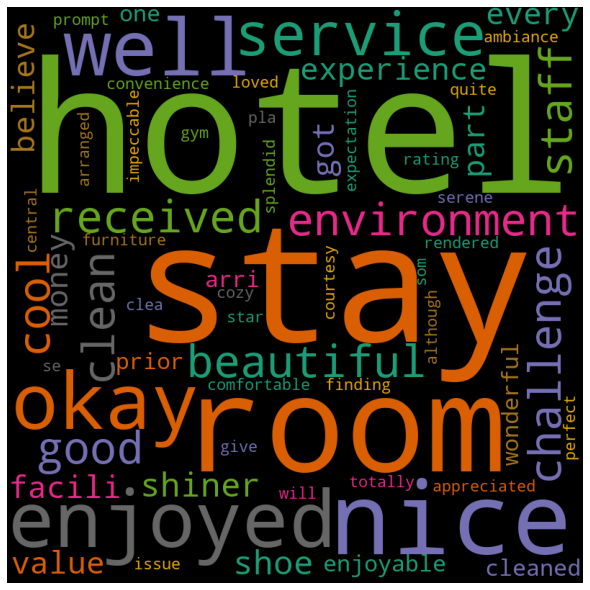

In [56]:
#wordcloud for the Review_text in Kaduna showing the frequency 
wordcloud = WordCloud(width = 800, height = 800, 
                colormap="Dark2",  
                min_font_size = 10).generate(' '.join(Review_Text_Kaduna['Cleaned'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()